##Analysis of data for Master's thesis



In [16]:
#import needed libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path   
import statsmodels.formula.api as smf



In [17]:
midpoints_path = Path(
    r"C:\Users\jussi\Seculo Seculorum Oy\Jussi Personal - Documents\Jussin gradu\Data in\Midpoints.xlsx"
)

# Read the workbook (pandas will pick the right engine; you can force "openpyxl" if you like)
midpoints = pd.read_excel(midpoints_path, engine="openpyxl")   # engine= optional

midpoints.head()

,Unnamed: 0,ticker,company,midpoint,midpoint_inx
0,0,ABBV,AbbVie Inc.,197.3050,101.766557
1,1,GOOGL,Alphabet,167.3375,103.633802
2,2,AMZN,Amazon.com,185.0150,104.504632
3,3,AAPL,Apple Inc.,227.8650,101.761790
4,4,BRK.B,Berkshire Hathaway,458.2600,103.784396


In [18]:
#Create in_path and files

in_path = os.path.join(os.getcwd(), "answerdata")

files = os.listdir(in_path)
in_path

'c:\\Users\\jussi\\Seculo Seculorum Oy\\Jussi Personal - Documents\\Jussin gradu\\Kysely_itse\\answerdata'

In [19]:
for file in files:
    if file.endswith(".csv"):
        base = os.path.splitext(os.path.basename(file))[0]   # get filename without extension
        df = pd.read_csv(os.path.join(in_path, file))        # load the data from the correct path
        globals()[base] = df    
    else:
        print("Not a .csv-file pass")
        pass

## Descriptive of background responsess

In [20]:
background_responses.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
user_id,5,5,33350764-0cde-423c-ac1c-1049d4cfa51a,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,5.0,NaN,NaN,NaN,34.0,14.335271,22.0,25.0,26.0,41.0,56.0
Gender,5,2,Female,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,5,3,Master's degree or equivalent,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvestmentExperience,5.0,NaN,NaN,NaN,13.2,13.103435,0.0,8.0,10.0,13.0,35.0
FinMarkEngagement,5,3,Daily,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AiEngagement,5,2,Daily,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RiskTolerance,5.0,NaN,NaN,NaN,3.6,0.894427,2.0,4.0,4.0,4.0,4.0
FamiliarityAI,5.0,NaN,NaN,NaN,4.0,1.224745,2.0,4.0,4.0,5.0,5.0


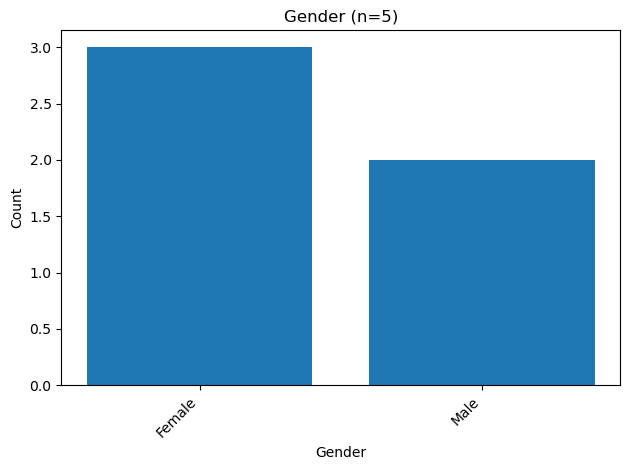

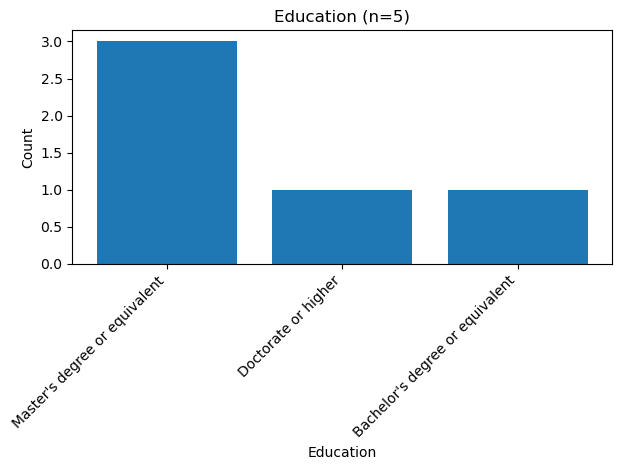

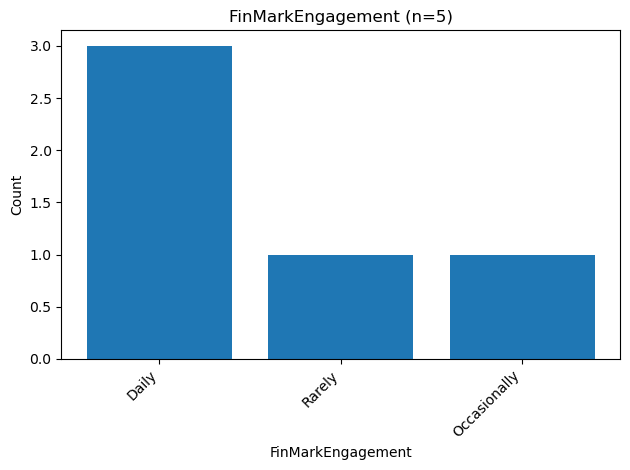

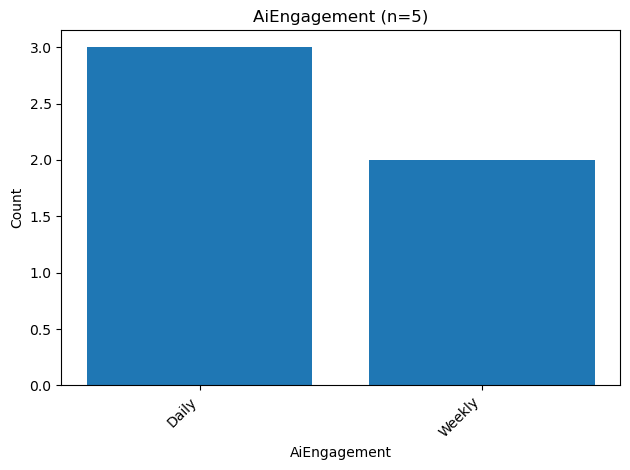

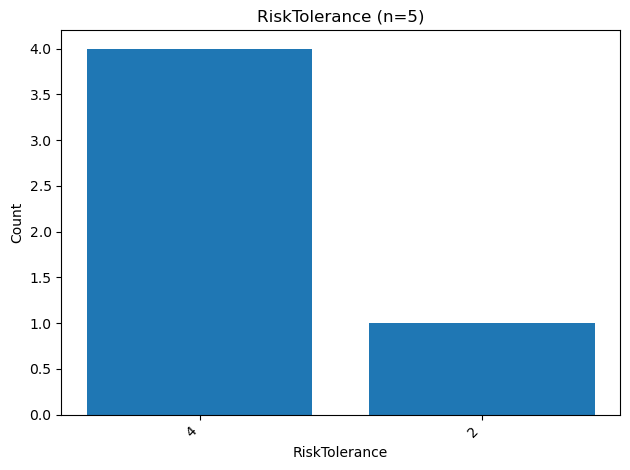

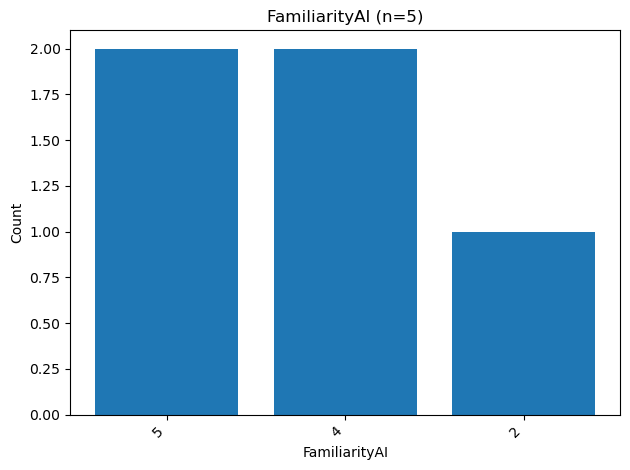

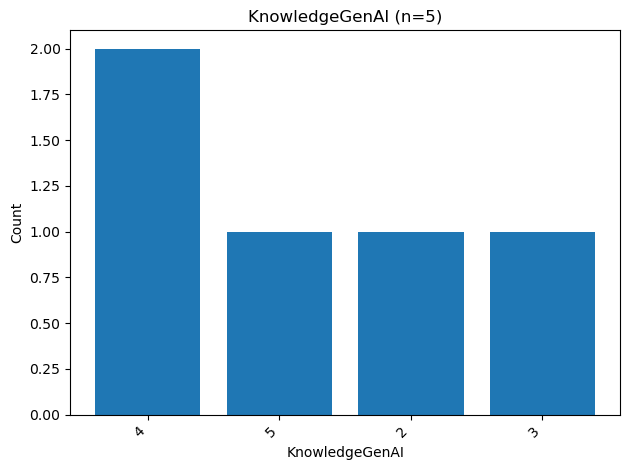

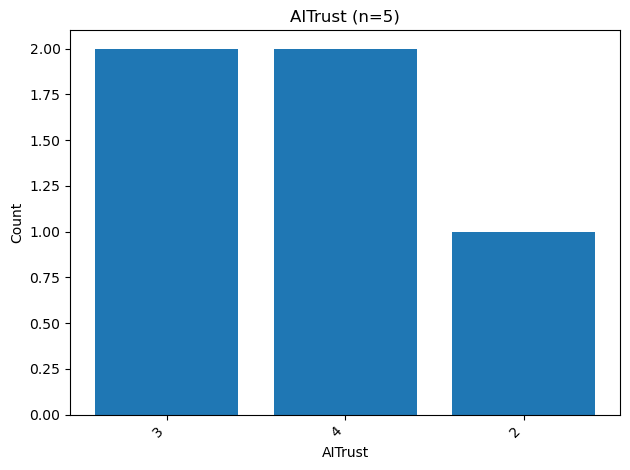

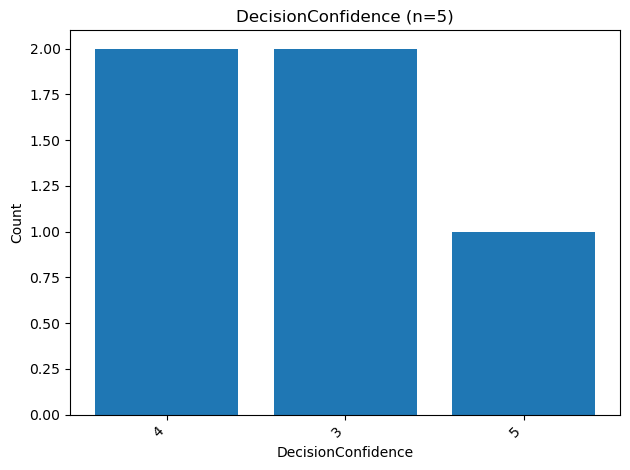

In [21]:
cols = [
        "Gender",
        "Education",
        "FinMarkEngagement",
        "AiEngagement",
        "RiskTolerance",
        "FamiliarityAI",
        "KnowledgeGenAI",
        "AITrust",
        "DecisionConfidence",
    ]

for col in cols:
        if col not in background_responses.columns:
            print(f"Column '{col}' not found in dataframe; skipping.")
            continue

        freq = (
            background_responses[col]
            .value_counts(dropna=False)
            .rename_axis(col)
            .reset_index(name="Count")
        )


        plt.figure()
        plt.bar(freq[col].astype(str), freq["Count"])
        plt.title(f"{col} (n={freq['Count'].sum()})")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

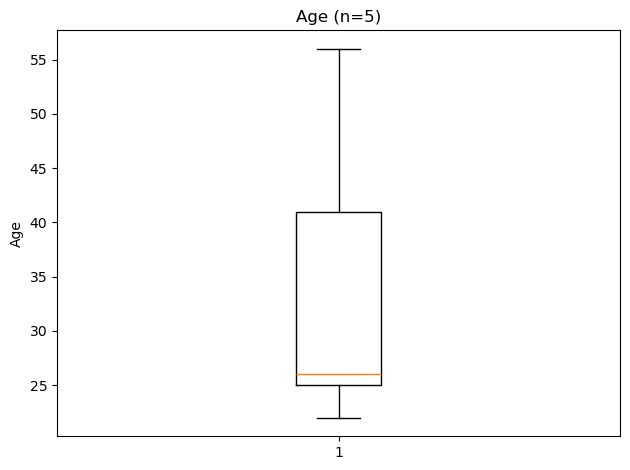

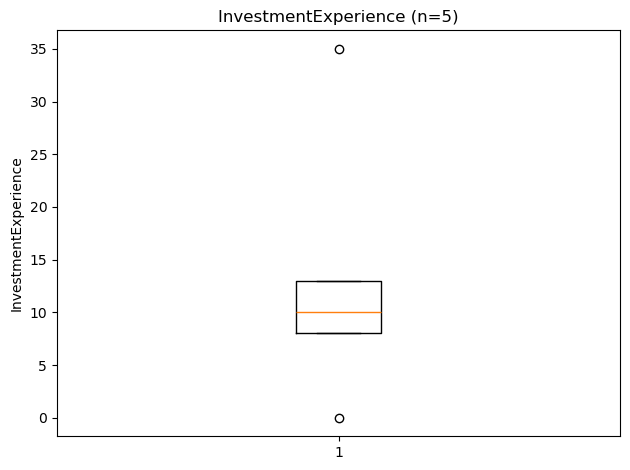

In [22]:
cols = ["Age", "InvestmentExperience"]
for col in cols:
    if col not in background_responses.columns:
        print(f"⚠️  Column '{col}' not found – skipping.")
        continue

    # Convert to numeric (if not already) & drop NaNs
    series = pd.to_numeric(background_responses[col], errors="coerce").dropna()

    if series.empty:
        print(f"⚠️  No numeric data available in column '{col}' – skipping.")
        continue


    # Boxplot
    plt.figure()
    plt.boxplot(series, vert=True)
    plt.title(f"{col} (n={len(series)})")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Descriptive of the responses

In [23]:
task1responses

,id,user_id,image_name,user_estimate,timestamp
0,1,33350764-0cde-423c-ac1c-1049d4cfa51a,NESTE OYJ.svg_positive.svg,90.42,2025-04-05 08:21:47
1,2,33350764-0cde-423c-ac1c-1049d4cfa51a,VALMET OYJ.svg,114.03,2025-04-05 08:21:54
2,3,33350764-0cde-423c-ac1c-1049d4cfa51a,NESTE OYJ.svg_neutral.svg,90.99,2025-04-05 08:22:01
3,4,33350764-0cde-423c-ac1c-1049d4cfa51a,MANDATUM HOLDING OY.svg,103.56,2025-04-05 08:22:05
4,5,33350764-0cde-423c-ac1c-1049d4cfa51a,METSO OUTOTEC OYJ.svg,102.23,2025-04-05 08:22:11
...,...,...,...,...,...
997,998,846e50b1-b000-435b-8d7d-53d250de71a1,TIETOEVRY OYJ.svg_positive.svg,102.04,2025-04-18 10:08:14
998,999,846e50b1-b000-435b-8d7d-53d250de71a1,ORION OYJ.svg_positive.svg,103.37,2025-04-18 10:08:17
999,1000,846e50b1-b000-435b-8d7d-53d250de71a1,AbbVie Inc..svg,100.70,2025-04-18 10:08:20
1000,1001,846e50b1-b000-435b-8d7d-53d250de71a1,Coca-Cola Co..svg_neutral.svg,102.80,2025-04-18 10:08:23


In [24]:
df = task1responses

In [25]:
def extract_company_manipulation(image_name):
    parts = image_name.split('.svg')
    company = parts[0]
    manipulation = parts[1].strip('_') if len(parts) > 1 else 'clean'  # default to 'clean' if not specified
    return pd.Series([company, manipulation])

# Apply the function to create the new columns
df[['company', 'manipulation']] = df['image_name'].apply(extract_company_manipulation)


df['manipulation'] = df['manipulation'].replace(r'^\s*$', 'clean', regex=True)



In [26]:
#Merge data with midpoints to add true_midpoint column

df = df.merge(midpoints[['company', 'midpoint_inx']], on='company', how='left')
df.rename(columns={'midpoint_inx': 'true_midpoint'}, inplace=True)

#Add a column that is answer_delta
df['answer_delta'] = df['user_estimate'] - df['true_midpoint']


In [27]:
# Define labels explicitly
ordered_labels = ['clean', 'neutral', 'positive', 'negative']

# Initialize a DataFrame for descriptive statistics
desc_stats = pd.DataFrame()

# Add statistics for the overall data first
desc_stats['All'] = df['answer_delta'].describe()

# Add statistics for each manipulation type in the specified order
for label in ordered_labels:
    desc_stats[label] = df[df['manipulation'] == label]['answer_delta'].describe()

# Display the descriptive statistics table
print(desc_stats)

               All       clean     neutral    positive    negative
count  1002.000000  250.000000  250.000000  252.000000  250.000000
mean     -1.373680   -1.421729   -1.376049   -1.239328   -1.458689
std       2.692926    2.701610    2.632718    2.814758    2.628456
min     -12.871790   -8.498603   -8.688603  -12.871790   -8.878603
25%      -3.034635   -2.925662   -2.986018   -3.042135   -3.170338
50%      -1.298497   -1.241781   -1.379921   -1.162203   -1.378084
75%      -0.079908   -0.137122   -0.171678    0.116320   -0.127626
max       8.749383    8.179383    8.329383    8.749383    8.749383


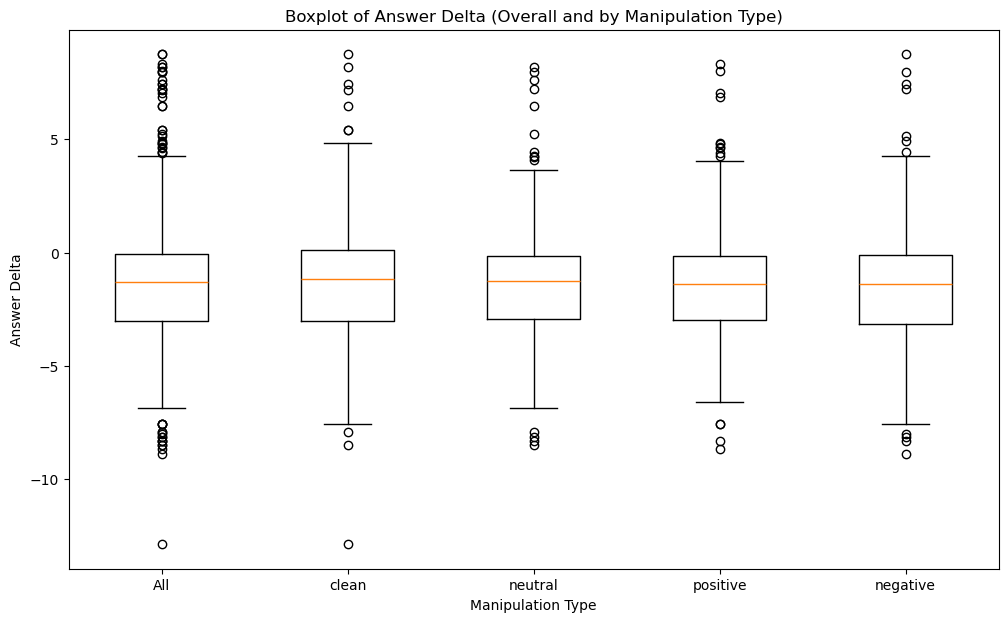

In [28]:
plt.figure(figsize=(12, 7))

ordered_labels = ['clean', 'neutral', 'positive', 'negative']

# Boxplot data for each manipulation
boxplot_data = [df[df['manipulation'] == manipulation]['answer_delta'] for manipulation in df['manipulation'].unique()]

# Insert the full dataset at the beginning
boxplot_data.insert(0, df['answer_delta'])

# Labels (adding "All" at the beginning)
labels = labels = ['All'] + ordered_labels

# Plot the combined boxplot
plt.boxplot(boxplot_data, labels=labels)

# Add titles and labels
plt.xlabel('Manipulation Type')
plt.ylabel('Answer Delta')
plt.title('Boxplot of Answer Delta (Overall and by Manipulation Type)')

# Display the plot
plt.show()


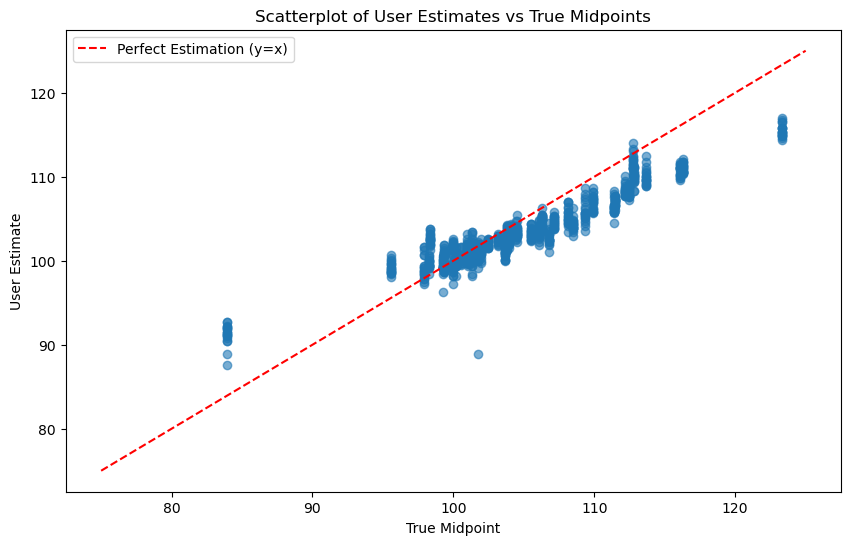

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot: user estimates vs. true midpoints
plt.scatter(df['true_midpoint'], df['user_estimate'], alpha=0.6)

# Line showing perfect estimation (y=x)
max_val = 125
min_val = 75
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Estimation (y=x)')

# Labels and title
plt.xlabel('True Midpoint')
plt.ylabel('User Estimate')
plt.title('Scatterplot of User Estimates vs True Midpoints')
plt.legend()

# Display the plot
plt.show()


## Regression 

In [30]:

# Test regression predicting answer_delta using manipulation type as a categorical variable
model = smf.ols('answer_delta ~ C(manipulation)', data=df).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           answer_delta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3181
Date:                Wed, 30 Apr 2025   Prob (F-statistic):              0.812
Time:                        12:25:44   Log-Likelihood:                -2413.4
No. Observations:                1002   AIC:                             4835.
Df Residuals:                     998   BIC:                             4854.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

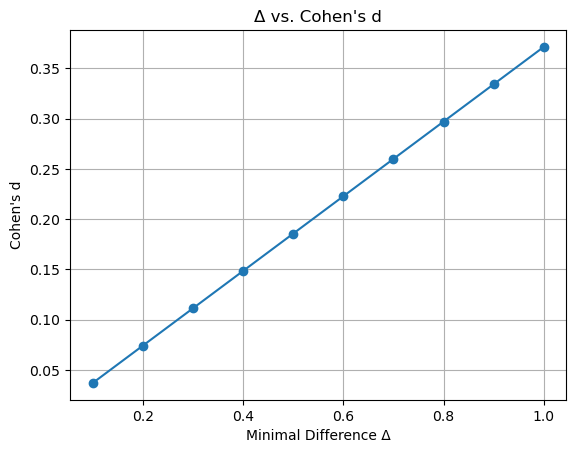

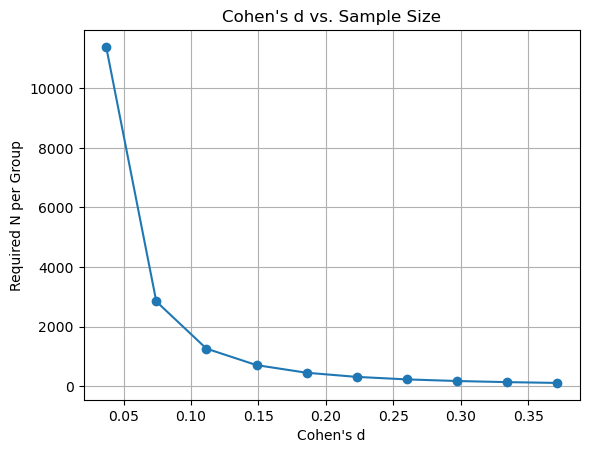

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Pilot standard deviation
sd = 2.693

# Define minimal detectable differences (Δ)
deltas = np.linspace(0.1, 1.0, 10)  # e.g. 0.1 to 1.0 units

# Compute Cohen's d
ds = deltas / sd

# Power analysis: α=0.05, power=0.80
analysis = TTestIndPower()
required_n = [
    analysis.solve_power(effect_size=d, alpha=0.05, power=0.8, alternative='two-sided')
    for d in ds
]

# Plot Δ vs. d
plt.figure()
plt.plot(deltas, ds, 'o-')
plt.xlabel("Minimal Difference Δ")
plt.ylabel("Cohen's d")
plt.title("Δ vs. Cohen's d")
plt.grid(True)

# Plot d vs. Required N
plt.figure()
plt.plot(ds, required_n, 'o-')
plt.xlabel("Cohen's d")
plt.ylabel("Required N per Group")
plt.title("Cohen's d vs. Sample Size")
plt.grid(True)

plt.show()


In [34]:
background_responses.head(
)

,id,user_id,Age,Gender,Education,InvestmentExperience,FinMarkEngagement,AiEngagement,RiskTolerance,FamiliarityAI,KnowledgeGenAI,AITrust,DecisionConfidence,timestamp
0,1,33350764-0cde-423c-ac1c-1049d4cfa51a,41,Male,Doctorate or higher,0,Rarely,Daily,2,5,5,3,4,2025-04-05 08:21:15
1,2,f947c183-9bb6-45cd-bdcb-097ac3687aa7,56,Female,Master's degree or equivalent,35,Daily,Weekly,4,2,2,4,3,2025-04-08 18:18:08
2,3,cd228882-d6f9-4c0a-a7e6-49c5765512fd,26,Male,Master's degree or equivalent,13,Daily,Daily,4,5,4,3,5,2025-04-13 14:08:42
3,4,403dad45-c63f-4e85-873d-d6cd773484f9,22,Female,Bachelor's degree or equivalent,10,Daily,Daily,4,4,4,4,3,2025-04-13 14:31:07
4,5,846e50b1-b000-435b-8d7d-53d250de71a1,25,Female,Master's degree or equivalent,8,Occasionally,Weekly,4,4,3,2,4,2025-04-18 09:55:55


In [36]:
background_responses.columns

Index(['id', 'user_id', 'Age', 'Gender', 'Education', 'InvestmentExperience',
       'FinMarkEngagement', 'AiEngagement', 'RiskTolerance', 'FamiliarityAI',
       'KnowledgeGenAI', 'AITrust', 'DecisionConfidence', 'timestamp'],
      dtype='object')

In [ ]:
combined = df.merge(
    background_responses,
    on='user_id',
    how='left',
    suffixes=('_task','_bg')
)


   id_task                               user_id                  image_name  \
0        1  33350764-0cde-423c-ac1c-1049d4cfa51a  NESTE OYJ.svg_positive.svg   
1        2  33350764-0cde-423c-ac1c-1049d4cfa51a              VALMET OYJ.svg   
2        3  33350764-0cde-423c-ac1c-1049d4cfa51a   NESTE OYJ.svg_neutral.svg   
3        4  33350764-0cde-423c-ac1c-1049d4cfa51a     MANDATUM HOLDING OY.svg   
4        5  33350764-0cde-423c-ac1c-1049d4cfa51a       METSO OUTOTEC OYJ.svg   

   user_estimate       timestamp_task              company manipulation  \
0          90.42  2025-04-05 08:21:47            NESTE OYJ     positive   
1         114.03  2025-04-05 08:21:54           VALMET OYJ        clean   
2          90.99  2025-04-05 08:22:01            NESTE OYJ      neutral   
3         103.56  2025-04-05 08:22:05  MANDATUM HOLDING OY        clean   
4         102.23  2025-04-05 08:22:11    METSO OUTOTEC OYJ        clean   

   true_midpoint  answer_delta  id_bg  ...            Education  \
0

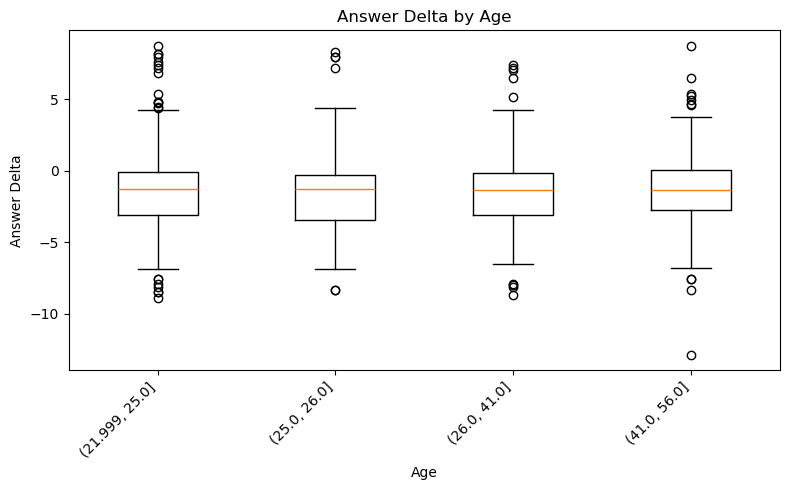

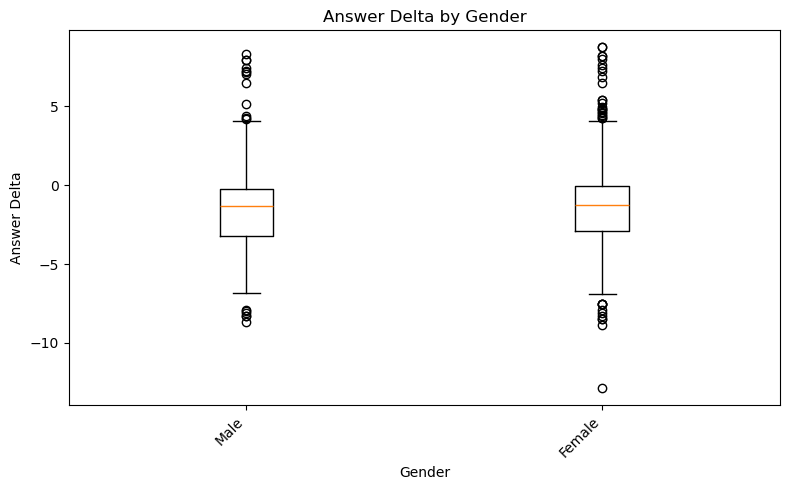

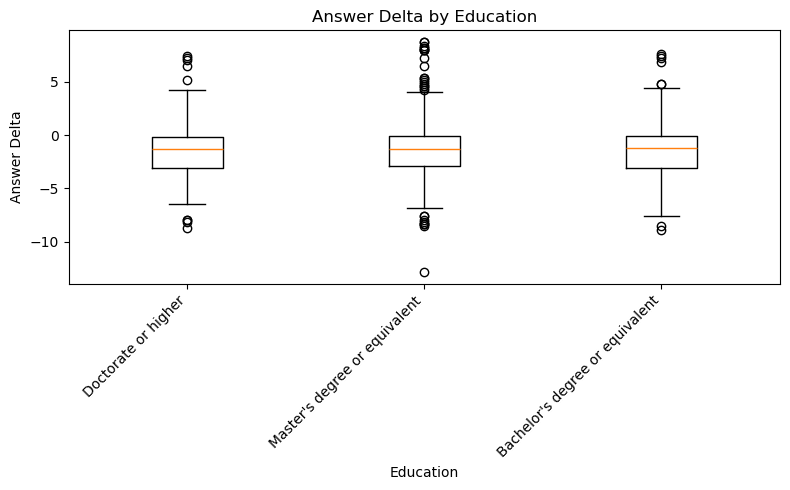

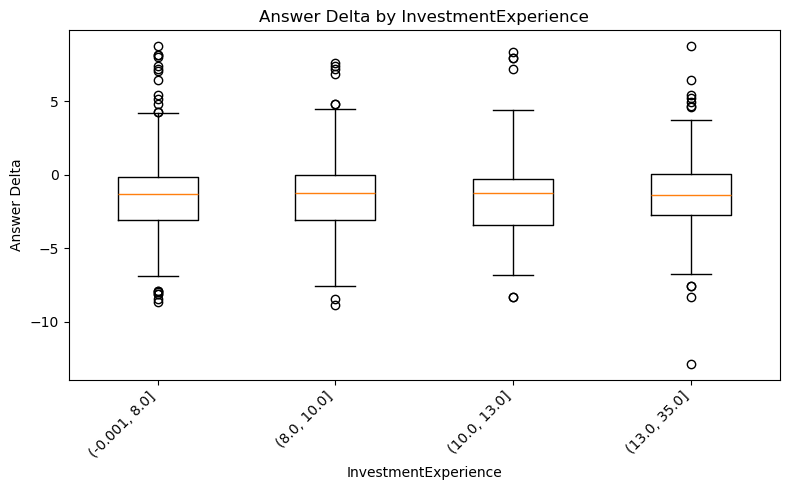

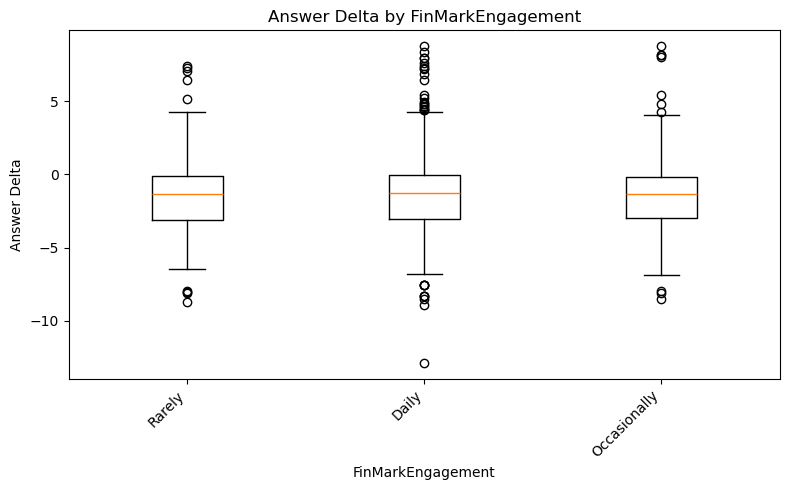

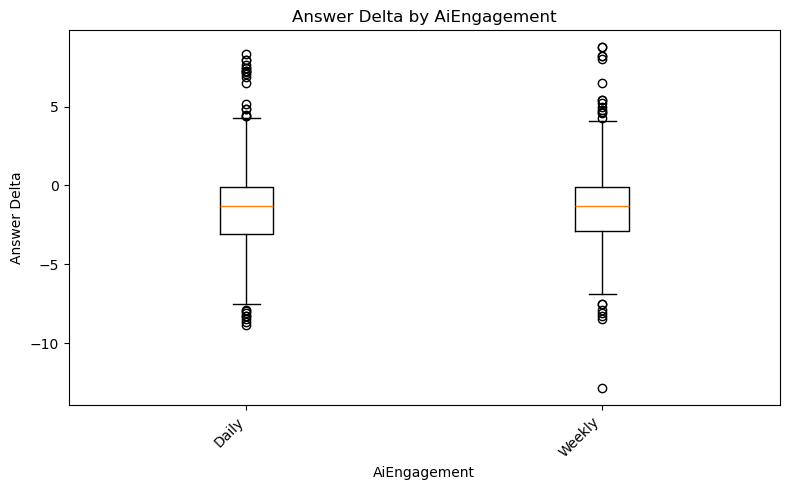

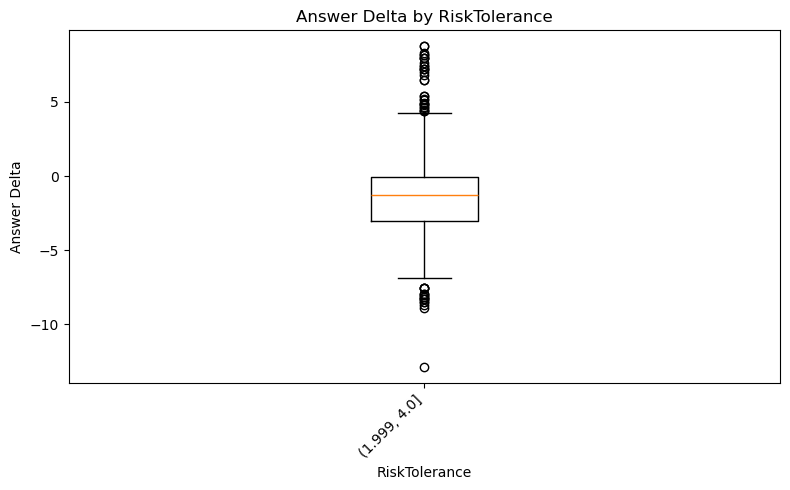

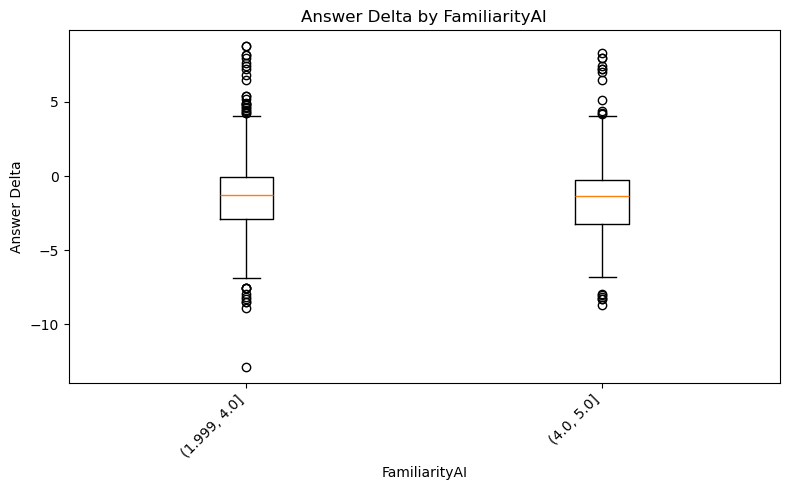

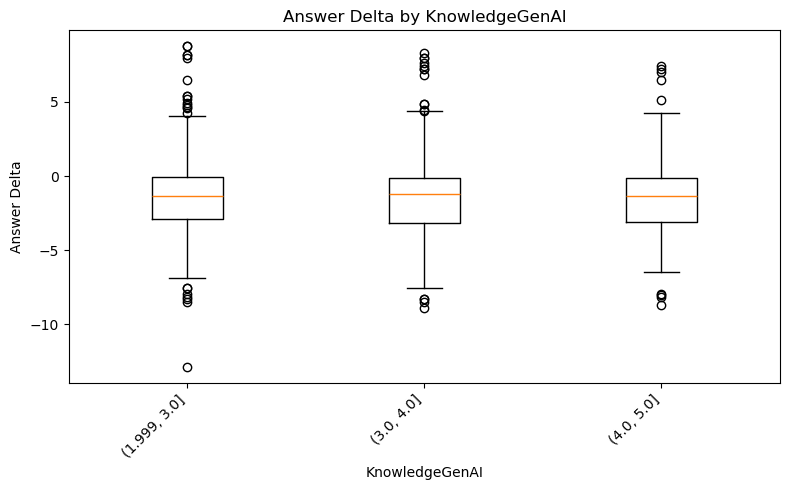

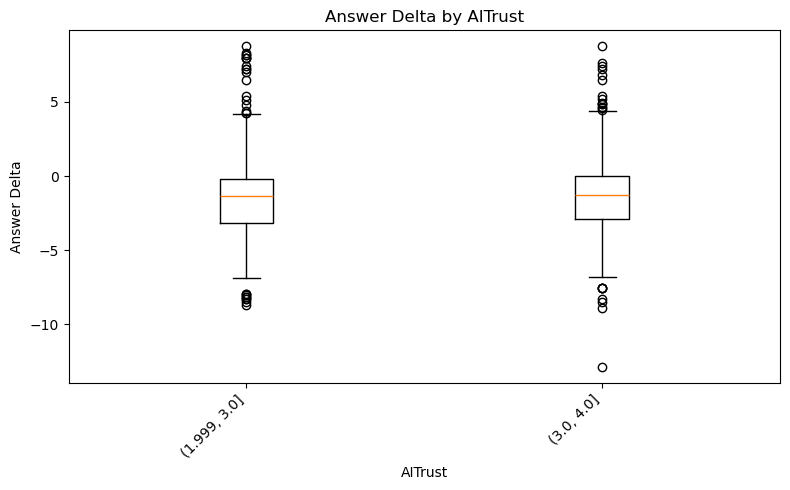

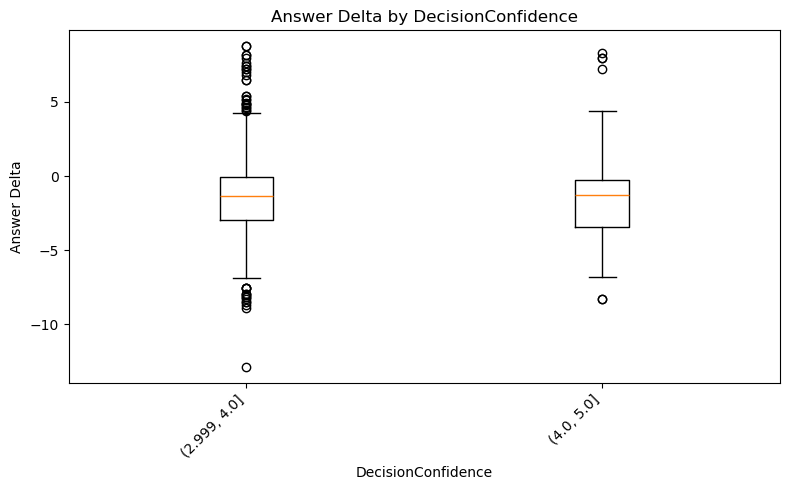

: 

In [ ]:

cols = [
    'Age', 'Gender', 'Education', 'InvestmentExperience',
    'FinMarkEngagement', 'AiEngagement', 'RiskTolerance',
    'FamiliarityAI', 'KnowledgeGenAI', 'AITrust', 'DecisionConfidence'
]

for col in cols:
    plt.figure(figsize=(8, 5))
    data, labels = [], []
    
    if pd.api.types.is_numeric_dtype(combined[col]):
        # Bin numeric into quartiles
        binned = pd.qcut(combined[col], q=4, duplicates='drop')
        for category in binned.cat.categories:
            subset = combined.loc[binned == category, 'answer_delta']
            data.append(subset)
            labels.append(str(category))
    else:
        # Categorical grouping
        for level in combined[col].dropna().unique():
            subset = combined.loc[combined[col] == level, 'answer_delta']
            data.append(subset)
            labels.append(str(level))
    
    # Plot
    plt.boxplot(data, labels=labels)
    plt.xlabel(col)
    plt.ylabel('Answer Delta')
    plt.title(f'Answer Delta by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()